# Day 7
batch size 256 lr 1e-3, normed weighted, rotated, cartesian, fixed rotation

### Import modules

In [1]:
%matplotlib inline
from __future__ import division
import sys
import os
os.environ['MKL_THREADING_LAYER']='GNU'
sys.path.append('../')
from Modules.Basics import *
from Modules.Class_Basics import *

/home/giles/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
/home/giles/anaconda2/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
Using TensorFlow backend.


## Options

In [7]:
classTrainFeatures = ['DER_mass_MMC', 'DER_mass_transverse_met_lep', 'DER_mass_vis', 'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet', 'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt', 'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality', 'DER_lep_eta_centrality', 'PRI_met_pt', 'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_all_pt', 'PRI_tau_px', 'PRI_tau_py', 'PRI_tau_pz', 'PRI_lep_px', 'PRI_lep_pz', 'PRI_jet_leading_px', 'PRI_jet_leading_py', 'PRI_jet_leading_pz', 'PRI_jet_subleading_px', 'PRI_jet_subleading_py', 'PRI_jet_subleading_pz', 'PRI_met_px', 'PRI_met_py']
inputPipe, outputPipe = getPreProcPipes(normIn=True)
classModel = 'modelSwish'
varSet = "basic_rot_features"

nSplits = 10
ensembleSize = 10
ensembleMode = 'loss'

maxEpochs = 200
compileArgs = {'loss':'binary_crossentropy', 'optimizer':'adam'}
trainParams = {'epochs' : 1, 'batch_size' : 256, 'verbose' : 0}
modelParams = {'version':classModel, 'nIn':len(classTrainFeatures), 'compileArgs':compileArgs, 'mode':'classififer'}

print "\nTraining on", len(classTrainFeatures), "features:", [var for var in classTrainFeatures]


Training on 30 features: ['DER_mass_MMC', 'DER_mass_transverse_met_lep', 'DER_mass_vis', 'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet', 'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt', 'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality', 'DER_lep_eta_centrality', 'PRI_met_pt', 'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_all_pt', 'PRI_tau_px', 'PRI_tau_py', 'PRI_tau_pz', 'PRI_lep_px', 'PRI_lep_pz', 'PRI_jet_leading_px', 'PRI_jet_leading_py', 'PRI_jet_leading_pz', 'PRI_jet_subleading_px', 'PRI_jet_subleading_py', 'PRI_jet_subleading_pz', 'PRI_met_px', 'PRI_met_py']


## Import data

In [8]:
trainData = h5py.File(dirLoc + 'train.hdf5', "r+")
valData = h5py.File(dirLoc + 'val.hdf5', "r+")

## Determine LR

2 classes found, running in binary mode


______________________________________
Training finished
Cross-validation took 1.284s 


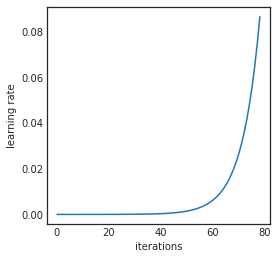

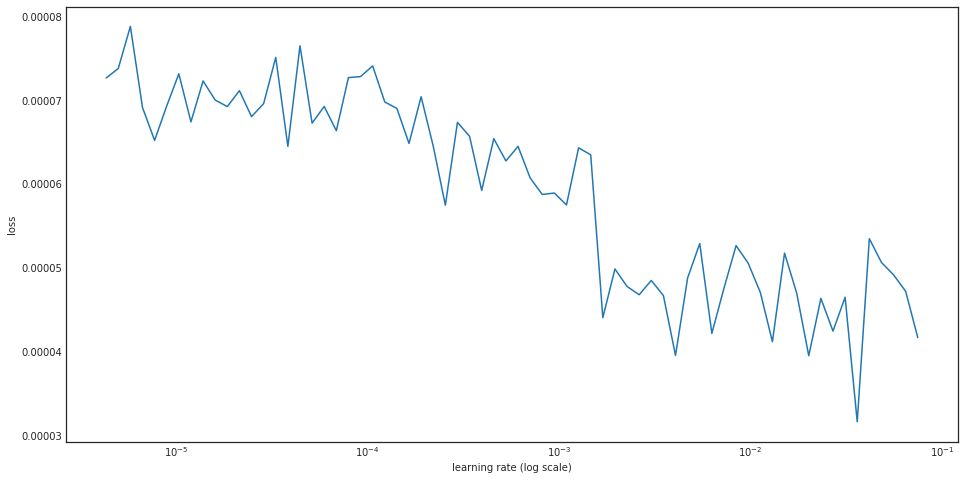

______________________________________



In [11]:
lrFinder = batchLRFind(trainData, nSplits, getModel, modelParams, trainParams, 'classifier', lrBounds=[1e-6,1e-1], trainOnWeights=True, verbose=0)

In [12]:
compileArgs['lr'] = 1e-3

## Train classifier

Using cosine annealing
Training using weights
Running fold 1 / 10
2 classes found, running in binary mode

1 New best found: 4.0974357201e-05
2 New best found: 3.72999894506e-05
3 New best found: 3.65583568555e-05
4 New best found: 3.57637023749e-05
5 New best found: 3.51582761608e-05
6 New best found: 3.47360240131e-05
7 New best found: 3.45838617081e-05
9 New best found: 3.3887862238e-05
10 New best found: 3.36343700654e-05
12 New best found: 3.34770784873e-05
13 New best found: 3.33193231557e-05
14 New best found: 3.32808031145e-05
15 New best found: 3.32479585012e-05
18 New best found: 3.31843033943e-05
20 New best found: 3.30680022574e-05
22 New best found: 3.29013502545e-05
24 New best found: 3.26710663197e-05
27 New best found: 3.2539587248e-05
28 New best found: 3.24765925454e-05
30 New best found: 3.24577162333e-05
31 New best found: 3.24514099661e-05
43 New best found: 3.23752525294e-05
45 New best found: 3.23192298186e-05
52 New best found: 3.22459611158e-05
55 New best foun

/home/giles/anaconda2/lib/python2.7/site-packages/keras/callbacks.py:116: UserWarning: Method on_batch_end() is slow compared to the batch update (0.135309). Check your callbacks.
  % delta_t_median)


1 New best found: 4.35039979746e-05
2 New best found: 3.70436567656e-05
3 New best found: 3.66143897338e-05
4 New best found: 3.55572134646e-05
5 New best found: 3.49868850615e-05
6 New best found: 3.46232908082e-05
7 New best found: 3.45656612166e-05
10 New best found: 3.42978532402e-05
11 New best found: 3.38139189157e-05
13 New best found: 3.36200409757e-05
14 New best found: 3.34952518395e-05
15 New best found: 3.34385467517e-05
20 New best found: 3.33958853083e-05
23 New best found: 3.32330841273e-05
26 New best found: 3.30607509378e-05
27 New best found: 3.30460787085e-05
28 New best found: 3.29993202439e-05
29 New best found: 3.29017105326e-05
46 New best found: 3.28735949245e-05
48 New best found: 3.27733137726e-05
51 New best found: 3.26584256979e-05
55 New best found: 3.26499556958e-05
56 New best found: 3.25690658959e-05
58 New best found: 3.25350339709e-05
60 New best found: 3.2524625908e-05
63 New best found: 3.25240568188e-05
101 New best found: 3.23749815143e-05
105 New 

/home/giles/anaconda2/lib/python2.7/site-packages/keras/callbacks.py:116: UserWarning: Method on_batch_end() is slow compared to the batch update (0.149120). Check your callbacks.
  % delta_t_median)


1 New best found: 4.16688234502e-05
2 New best found: 3.73459649277e-05
3 New best found: 3.66261445664e-05
4 New best found: 3.5563479151e-05
5 New best found: 3.49952398703e-05
6 New best found: 3.44458820761e-05
7 New best found: 3.43300891756e-05
9 New best found: 3.39813330354e-05
10 New best found: 3.39783050029e-05
11 New best found: 3.37193016764e-05
12 New best found: 3.35771595091e-05
13 New best found: 3.33938289924e-05
14 New best found: 3.32928114107e-05
22 New best found: 3.30152705016e-05
23 New best found: 3.29909633669e-05
24 New best found: 3.29799324395e-05
25 New best found: 3.29153389495e-05
27 New best found: 3.28499968432e-05
28 New best found: 3.28390332873e-05
29 New best found: 3.28065574168e-05
30 New best found: 3.2768984816e-05
31 New best found: 3.27590155179e-05
43 New best found: 3.26231009e-05
50 New best found: 3.2520389532e-05
52 New best found: 3.25108822977e-05
54 New best found: 3.2485662545e-05
56 New best found: 3.24801850608e-05
58 New best foun

/home/giles/anaconda2/lib/python2.7/site-packages/keras/callbacks.py:116: UserWarning: Method on_batch_end() is slow compared to the batch update (0.159465). Check your callbacks.
  % delta_t_median)


1 New best found: 4.13359457032e-05
2 New best found: 3.6642228794e-05
3 New best found: 3.54902086545e-05
4 New best found: 3.44012272128e-05
5 New best found: 3.37773653283e-05
6 New best found: 3.33449309891e-05
7 New best found: 3.3302205626e-05
10 New best found: 3.27359002616e-05
12 New best found: 3.23600268001e-05
14 New best found: 3.23055242563e-05
15 New best found: 3.22879051678e-05
21 New best found: 3.22413923163e-05
22 New best found: 3.21347052228e-05
24 New best found: 3.19439382993e-05
27 New best found: 3.18836280633e-05
29 New best found: 3.18471798289e-05
30 New best found: 3.18384926659e-05
31 New best found: 3.18318025751e-05
46 New best found: 3.17014365443e-05
51 New best found: 3.16916310459e-05
52 New best found: 3.1689508307e-05
53 New best found: 3.16739347888e-05
54 New best found: 3.15962807432e-05
56 New best found: 3.15391571998e-05
57 New best found: 3.15285035622e-05
58 New best found: 3.1498751224e-05
110 New best found: 3.14741846473e-05
115 New bes

/home/giles/anaconda2/lib/python2.7/site-packages/keras/callbacks.py:116: UserWarning: Method on_batch_end() is slow compared to the batch update (0.236157). Check your callbacks.
  % delta_t_median)
/home/giles/anaconda2/lib/python2.7/site-packages/keras/callbacks.py:116: UserWarning: Method on_batch_end() is slow compared to the batch update (0.118442). Check your callbacks.
  % delta_t_median)


1 New best found: 4.03951522903e-05
2 New best found: 3.69749105747e-05
3 New best found: 3.61793815093e-05
4 New best found: 3.5417667102e-05
6 New best found: 3.45746507476e-05
7 New best found: 3.43344717079e-05
10 New best found: 3.4009881404e-05
11 New best found: 3.37095403311e-05
13 New best found: 3.34052612797e-05
14 New best found: 3.33825472248e-05
20 New best found: 3.33818346685e-05
22 New best found: 3.31635365376e-05
24 New best found: 3.30716312642e-05
25 New best found: 3.30476729363e-05
27 New best found: 3.30138821191e-05
28 New best found: 3.29185958506e-05
29 New best found: 3.28989252633e-05
30 New best found: 3.28799935622e-05
31 New best found: 3.28739991874e-05
46 New best found: 3.27798664642e-05
50 New best found: 3.26981267926e-05
55 New best found: 3.26608316992e-05
56 New best found: 3.26421300731e-05
57 New best found: 3.26418214791e-05
58 New best found: 3.25889944103e-05
59 New best found: 3.25857944724e-05
100 New best found: 3.25710898694e-05
103 New 

/home/giles/anaconda2/lib/python2.7/site-packages/keras/callbacks.py:116: UserWarning: Method on_batch_end() is slow compared to the batch update (0.235791). Check your callbacks.
  % delta_t_median)
/home/giles/anaconda2/lib/python2.7/site-packages/keras/callbacks.py:116: UserWarning: Method on_batch_end() is slow compared to the batch update (0.118294). Check your callbacks.
  % delta_t_median)


1 New best found: 4.22381966027e-05
2 New best found: 3.70467745016e-05
3 New best found: 3.64321018617e-05
4 New best found: 3.5512901133e-05
5 New best found: 3.44100540439e-05
6 New best found: 3.40924961842e-05
7 New best found: 3.39353874399e-05
9 New best found: 3.33697395414e-05
10 New best found: 3.32247694569e-05
11 New best found: 3.28968817307e-05
12 New best found: 3.27314182898e-05
13 New best found: 3.25931293549e-05
14 New best found: 3.25140619346e-05
15 New best found: 3.24967372759e-05
21 New best found: 3.2425041764e-05
22 New best found: 3.21706244346e-05
24 New best found: 3.21370626498e-05
25 New best found: 3.20187526313e-05
26 New best found: 3.19927972437e-05
27 New best found: 3.18341633095e-05
28 New best found: 3.18004048277e-05
29 New best found: 3.17766450532e-05
30 New best found: 3.1771436975e-05
31 New best found: 3.17689369031e-05
46 New best found: 3.15926343778e-05
51 New best found: 3.15670731037e-05
55 New best found: 3.14982256632e-05
56 New best 

/home/giles/anaconda2/lib/python2.7/site-packages/keras/callbacks.py:116: UserWarning: Method on_batch_end() is slow compared to the batch update (0.240771). Check your callbacks.
  % delta_t_median)
/home/giles/anaconda2/lib/python2.7/site-packages/keras/callbacks.py:116: UserWarning: Method on_batch_end() is slow compared to the batch update (0.120647). Check your callbacks.
  % delta_t_median)


1 New best found: 4.138250569e-05
2 New best found: 3.681909272e-05
3 New best found: 3.58893387748e-05
4 New best found: 3.52143318664e-05
5 New best found: 3.49026639699e-05
6 New best found: 3.42383525034e-05
7 New best found: 3.41560959696e-05
10 New best found: 3.36817158215e-05
11 New best found: 3.36766799872e-05
12 New best found: 3.34271942035e-05
13 New best found: 3.3338618702e-05
14 New best found: 3.32068304609e-05
15 New best found: 3.3198303146e-05
20 New best found: 3.31833086031e-05
23 New best found: 3.30587805631e-05
24 New best found: 3.29478627067e-05
25 New best found: 3.27946252205e-05
26 New best found: 3.27439091889e-05
27 New best found: 3.27168076176e-05
29 New best found: 3.27119707399e-05
41 New best found: 3.26522128241e-05
43 New best found: 3.25138943776e-05
52 New best found: 3.2401711709e-05
55 New best found: 3.23926122963e-05
56 New best found: 3.23923531244e-05
58 New best found: 3.23923203541e-05
59 New best found: 3.23599912606e-05
60 New best fou

/home/giles/anaconda2/lib/python2.7/site-packages/keras/callbacks.py:116: UserWarning: Method on_batch_end() is slow compared to the batch update (0.253692). Check your callbacks.
  % delta_t_median)
/home/giles/anaconda2/lib/python2.7/site-packages/keras/callbacks.py:116: UserWarning: Method on_batch_end() is slow compared to the batch update (0.127148). Check your callbacks.
  % delta_t_median)


1 New best found: 4.01119632979e-05
2 New best found: 3.64435564533e-05
3 New best found: 3.58017041397e-05
4 New best found: 3.53047445583e-05
5 New best found: 3.47517206183e-05
6 New best found: 3.39547417431e-05
7 New best found: 3.38033381482e-05
9 New best found: 3.35685012347e-05
10 New best found: 3.33954607933e-05
11 New best found: 3.31678921231e-05
12 New best found: 3.31084534494e-05
13 New best found: 3.28823524792e-05
14 New best found: 3.2854971064e-05
15 New best found: 3.28387360436e-05
21 New best found: 3.27566145863e-05
23 New best found: 3.27451698315e-05
24 New best found: 3.25766850695e-05
25 New best found: 3.25046686818e-05
26 New best found: 3.2399258231e-05
28 New best found: 3.23076930979e-05
30 New best found: 3.22922543568e-05
44 New best found: 3.22400017511e-05
50 New best found: 3.2213188346e-05
51 New best found: 3.20477333245e-05
55 New best found: 3.20128740067e-05
57 New best found: 3.19986657601e-05
58 New best found: 3.19812791185e-05
60 New best 

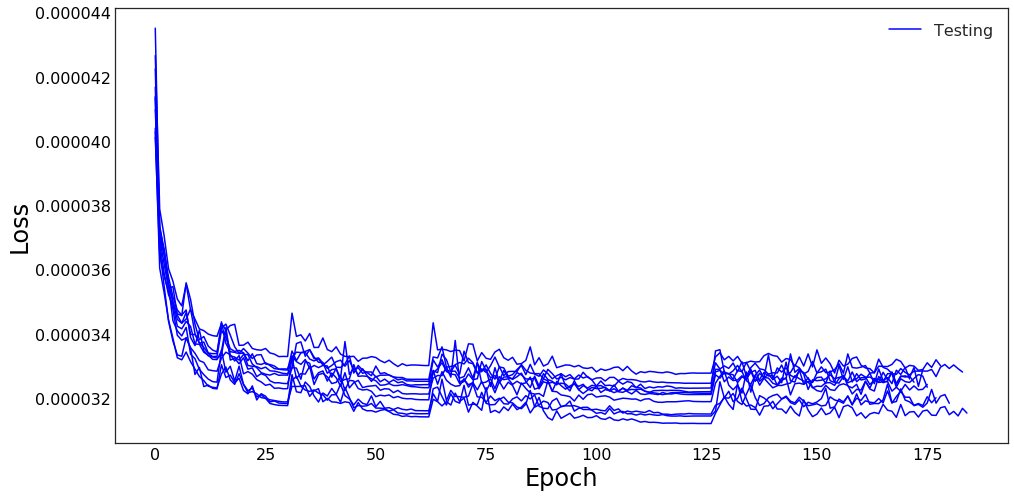

Mean wAUC = 0.0642 +- 0.0006
______________________________________



In [13]:
results, histories = batchTrainClassifier(trainData, nSplits, getModel, modelParams, trainParams, patience=60, cosAnnealMult=2, trainOnWeights=True, maxEpochs=maxEpochs, verbose=1)

## Construct ensemble

In [14]:
with open('train_weights/resultsFile.pkl', 'r') as fin:   
    results = pickle.load(fin)

In [15]:
ensemble, weights = assembleEnsemble(results, ensembleSize, ensembleMode, compileArgs)

Choosing ensemble by loss
Model 0 is 7 with loss = 3.1210785073312126e-05
Model 1 is 5 with loss = 3.143553309114271e-05
Model 2 is 2 with loss = 3.1485101507168435e-05
Model 3 is 9 with loss = 3.1870115993328594e-05
Model 4 is 8 with loss = 3.2109622757124976e-05
Model 5 is 0 with loss = 3.211041122147334e-05
Model 6 is 4 with loss = 3.21800299887648e-05
Model 7 is 3 with loss = 3.229926270865604e-05
Model 8 is 6 with loss = 3.2462078991155415e-05
Model 9 is 1 with loss = 3.274023951838391e-05


## Response on development data

In [16]:
batchEnsemblePredict(ensemble, weights, trainData, ensembleSize=10, verbose=1)

Predicting batch 1 out of 10
Prediction took 0.000522597623666s per sample

Predicting batch 2 out of 10
Prediction took 0.000304391423343s per sample

Predicting batch 3 out of 10
Prediction took 0.000299876311154s per sample

Predicting batch 4 out of 10
Prediction took 0.000299720346928s per sample

Predicting batch 5 out of 10
Prediction took 0.000300206005573s per sample

Predicting batch 6 out of 10
Prediction took 0.000303460800648s per sample

Predicting batch 7 out of 10
Prediction took 0.000304161202908s per sample

Predicting batch 8 out of 10
Prediction took 0.000300054151038s per sample

Predicting batch 9 out of 10
Prediction took 0.000302171556942s per sample

Predicting batch 10 out of 10
Prediction took 0.000300468018701s per sample



In [17]:
print 'Training ROC AUC: unweighted {}, weighted {}'.format(roc_auc_score(getFeature('targets', trainData), getFeature('pred', trainData)),
                                                            roc_auc_score(getFeature('targets', trainData), getFeature('pred', trainData), sample_weight=getFeature('weights', trainData)))

Training ROC AUC: unweighted 0.904892214839, weighted 0.94044453012


## Response on val data

In [18]:
batchEnsemblePredict(ensemble, weights, valData, ensembleSize=10, verbose=1)

Predicting batch 1 out of 10
Prediction took 0.000307600975037s per sample

Predicting batch 2 out of 10
Prediction took 0.000313073015213s per sample

Predicting batch 3 out of 10
Prediction took 0.000319291210175s per sample

Predicting batch 4 out of 10
Prediction took 0.000304115819931s per sample

Predicting batch 5 out of 10
Prediction took 0.000306300783157s per sample

Predicting batch 6 out of 10
Prediction took 0.000311088371277s per sample

Predicting batch 7 out of 10
Prediction took 0.000309047794342s per sample

Predicting batch 8 out of 10
Prediction took 0.000303256988525s per sample

Predicting batch 9 out of 10
Prediction took 0.00030956902504s per sample

Predicting batch 10 out of 10
Prediction took 0.000301740407944s per sample



In [19]:
print 'Testing ROC AUC: unweighted {}, weighted {}'.format(roc_auc_score(getFeature('targets', valData), getFeature('pred', valData)),
                                                           roc_auc_score(getFeature('targets', valData), getFeature('pred', valData), sample_weight=getFeature('weights', valData)))

Testing ROC AUC: unweighted 0.901881953594, weighted 0.934822972363


## Evaluation

### Import in dataframe

In [20]:
valframe = convertToDF(valData)

50000 candidates loaded


In [21]:
sigVal = (valframe.gen_target == 1)
bkgVal = (valframe.gen_target == 0)

### MVA distributions

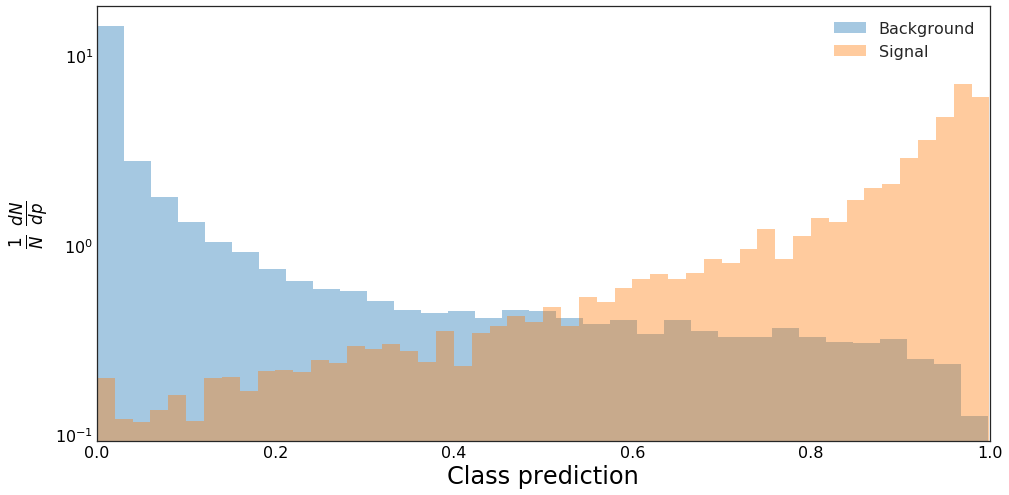

In [22]:
getClassPredPlot([valframe[bkgVal], valframe[sigVal]], weightName='gen_weight')

In [23]:
valframe['ams'] = amsScan(valframe)[0]

[0.9403312802314758, 1.685564257934902]


In [32]:
def foldAMSScan(inData, N=10):
    kf = StratifiedKFold(n_splits=N, shuffle=True)
    folds = kf.split(inData, inData['gen_target'])
    bests = []
    for i, (train, test) in enumerate(folds):
        bests.append(amsScan(inData.iloc[test], (np.sum(inData[(inData['gen_target'] == 1)]['gen_weight']), np.sum(inData[(inData['gen_target'] == 0)]['gen_weight'])))[1])
        print "Fold {}, best AMS {} at cut of {}. Total weights Signal:Bkg. {}:{}".format(i, bests[-1][1], bests[-1][0],
                                                                                          np.sum(inData.iloc[test][inData.gen_target == 1]['gen_weight']),
                                                                                          np.sum(inData.iloc[test][inData.gen_target == 0]['gen_weight']))
    print "Mean cut", np.average([x[0] for x in bests], weights=[1/x[1] for x in bests]), "mean AMS", np.average([x[1] for x in bests], weights=[1/x[1] for x in bests])
    return bests

In [59]:
bests = foldAMSScan(valframe, 10)

[0.9568625688552856, 1.9314919212582524]
Fold 0, best AMS 1.93149192126 at cut of 0.956862568855. Total weights Signal:Bkg. 14.0879707336:8211.14746094


/home/giles/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/home/giles/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


[0.9694336652755737, 2.853514296535758]
Fold 1, best AMS 2.85351429654 at cut of 0.969433665276. Total weights Signal:Bkg. 13.2644100189:8078.71435547
[0.9183012843132019, 1.5097842938973467]
Fold 2, best AMS 1.5097842939 at cut of 0.918301284313. Total weights Signal:Bkg. 13.2919034958:8067.33691406
[0.9618738293647766, 1.7846391794837593]
Fold 3, best AMS 1.78463917948 at cut of 0.961873829365. Total weights Signal:Bkg. 13.6949253082:8312.59863281
[0.9693795442581177, 2.338791278728295]
Fold 4, best AMS 2.33879127873 at cut of 0.969379544258. Total weights Signal:Bkg. 14.0400314331:8233.64550781
[0.9805371761322021, 1.9621260855972165]
Fold 5, best AMS 1.9621260856 at cut of 0.980537176132. Total weights Signal:Bkg. 14.5095424652:8169.92724609
[0.9826875329017639, 2.0242752252854523]
Fold 6, best AMS 2.02427522529 at cut of 0.982687532902. Total weights Signal:Bkg. 13.4619636536:8275.5
[0.9367393851280212, 1.554131797098036]
Fold 7, best AMS 1.5541317971 at cut of 0.936739385128. Tot

In [60]:
bests

[[0.9568625688552856, 1.9314919212582524],
 [0.9694336652755737, 2.853514296535758],
 [0.9183012843132019, 1.5097842938973467],
 [0.9618738293647766, 1.7846391794837593],
 [0.9693795442581177, 2.338791278728295],
 [0.9805371761322021, 1.9621260855972165],
 [0.9826875329017639, 2.0242752252854523],
 [0.9367393851280212, 1.554131797098036],
 [0.9608435034751892, 2.163318632435079],
 [0.9855132699012756, 2.377860634033714]]

In [61]:
print np.average([x[0] for x in bests], weights=[1/x[1] for x in bests])
print np.average([x[0] for x in bests], weights=[x[1] for x in bests])
print np.average([x[0] for x in bests], weights=[1.685564257934902-x[1] for x in bests])
print np.average([x[0] for x in bests], weights=[1/np.abs(1.685564257934902-x[1]) for x in bests])

0.9593958466668531
0.9646706523055166
0.9760185175046745
0.9548498536842881


In [25]:
scoreTest(ensemble, weights)

Predicting batch 1 out of 10
Prediction took 0.00030400612571s per sample

Predicting batch 2 out of 10
Prediction took 0.00030790756399s per sample

Predicting batch 3 out of 10
Prediction took 0.000306481018933s per sample

Predicting batch 4 out of 10
Prediction took 0.000302766327424s per sample

Predicting batch 5 out of 10
Prediction took 0.000305865235762s per sample

Predicting batch 6 out of 10
Prediction took 0.000302911602367s per sample

Predicting batch 7 out of 10
Prediction took 0.00030692059777s per sample

Predicting batch 8 out of 10
Prediction took 0.000304399564049s per sample

Predicting batch 9 out of 10
Prediction took 0.00030497803688s per sample

Predicting batch 10 out of 10
Prediction took 0.00030328761881s per sample



In [57]:
saveTest(0.9625362587280859, 'Day_7')

../Data/Day_7_test.csv


In [58]:
!kaggle competitions submit -c higgs-boson -f ../Data/Day_7_test.csv -m"Day_7 inverse 50"

Successfully submitted to Higgs Boson Machine Learning Challenge